In [1]:
# !pip install deap

In [2]:
from deap import creator, base, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

In [3]:
toolbox = base.Toolbox()
n = 4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Minimização
creator.create("EstrIndividuo", list, fitness=creator.FitnessMin) # Estrutura do Indivíduo

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.EstrIndividuo, toolbox.Genes)
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

In [4]:
pop = toolbox.Populacao(n=10)
pop

[[0, 3, 2, 1],
 [0, 2, 3, 1],
 [2, 1, 0, 3],
 [1, 2, 3, 0],
 [3, 0, 1, 2],
 [2, 1, 0, 3],
 [1, 3, 0, 2],
 [3, 0, 1, 2],
 [0, 1, 2, 3],
 [3, 2, 1, 0]]

In [5]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)

In [6]:
dist = [[0, 7, 9, 2],
        [4, 0, 3, 7],
        [6, 7, 0, 8],
        [2, 3, 8, 0]]

In [7]:
def aptidao(individuo):
    f = 0
    for i in range(n - 1):
      local1 = individuo[i]
      local2 = individuo[i + 1]
      distancia = dist[local1][local2]
      f = f + distancia

    return f,

def estatisticaSalvar(individual):
  return individual.fitness.values

In [8]:
toolbox.register("evaluate", aptidao)

In [9]:
estatisticas = tools.Statistics(estatisticaSalvar)
estatisticas.register("mean", np.mean)
estatisticas.register("min", np.min)
estatisticas.register("max", np.max)

In [10]:
hall_of_fame = tools.HallOfFame(1)

In [11]:
result, log = algorithms.eaSimple(
    pop,
    toolbox,
    cxpb=0.8,
    mutpb=0.1,
    stats=estatisticas,
    ngen=5000,
    halloffame=hall_of_fame,
    verbose=True)

result

gen	nevals	mean	min	max
0  	10    	15.5	12 	20 
1  	8     	16.7	12 	22 
2  	8     	16.7	12 	23 
3  	9     	12.9	11 	16 
4  	8     	15.7	12 	21 
5  	6     	13  	12 	18 
6  	10    	12.8	12 	16 
7  	8     	12  	12 	12 
8  	7     	12  	12 	12 
9  	4     	12  	12 	12 
10 	8     	13.4	12 	19 
11 	6     	12  	12 	12 
12 	8     	12.4	12 	16 
13 	10    	12.4	12 	16 
14 	6     	12  	12 	12 
15 	9     	12  	12 	12 
16 	8     	12  	12 	12 
17 	6     	12  	12 	12 
18 	4     	12  	12 	12 
19 	8     	12  	12 	12 
20 	7     	12.2	12 	14 
21 	8     	12.6	12 	18 
22 	7     	12  	12 	12 
23 	10    	12  	12 	12 
24 	8     	12  	12 	12 
25 	10    	11.6	8  	12 
26 	10    	11.6	8  	12 
27 	6     	11.9	8  	19 
28 	10    	10.7	8  	19 
29 	8     	9.6 	8  	12 
30 	10    	8.4 	8  	12 
31 	10    	8   	8  	8  
32 	10    	8   	8  	8  
33 	8     	8   	8  	8  
34 	10    	8   	8  	8  
35 	8     	8   	8  	8  
36 	7     	9.1 	8  	15 
37 	10    	8   	8  	8  
38 	7     	8   	8  	8  
39 	8     	8   	8  	8  
40 	10    	9.5 	

[[0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2],
 [0, 3, 1, 2]]

In [12]:
melhor = hall_of_fame[0]
aptidao(melhor)

(8,)

In [13]:
log

[{'gen': 0, 'nevals': 10, 'mean': 15.5, 'min': 12.0, 'max': 20.0},
 {'gen': 1, 'nevals': 8, 'mean': 16.7, 'min': 12.0, 'max': 22.0},
 {'gen': 2, 'nevals': 8, 'mean': 16.7, 'min': 12.0, 'max': 23.0},
 {'gen': 3, 'nevals': 9, 'mean': 12.9, 'min': 11.0, 'max': 16.0},
 {'gen': 4, 'nevals': 8, 'mean': 15.7, 'min': 12.0, 'max': 21.0},
 {'gen': 5, 'nevals': 6, 'mean': 13.0, 'min': 12.0, 'max': 18.0},
 {'gen': 6, 'nevals': 10, 'mean': 12.8, 'min': 12.0, 'max': 16.0},
 {'gen': 7, 'nevals': 8, 'mean': 12.0, 'min': 12.0, 'max': 12.0},
 {'gen': 8, 'nevals': 7, 'mean': 12.0, 'min': 12.0, 'max': 12.0},
 {'gen': 9, 'nevals': 4, 'mean': 12.0, 'min': 12.0, 'max': 12.0},
 {'gen': 10, 'nevals': 8, 'mean': 13.4, 'min': 12.0, 'max': 19.0},
 {'gen': 11, 'nevals': 6, 'mean': 12.0, 'min': 12.0, 'max': 12.0},
 {'gen': 12, 'nevals': 8, 'mean': 12.4, 'min': 12.0, 'max': 16.0},
 {'gen': 13, 'nevals': 10, 'mean': 12.4, 'min': 12.0, 'max': 16.0},
 {'gen': 14, 'nevals': 6, 'mean': 12.0, 'min': 12.0, 'max': 12.0},
 {

In [14]:
menores = log.select("min")
maiores = log.select("max")
medias = log.select("mean")

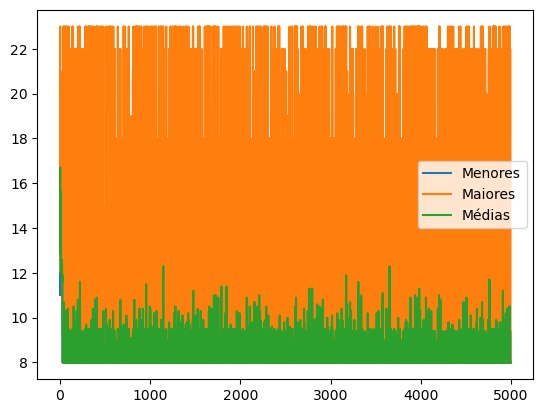

In [15]:
plt.plot(menores, label="Menores")
plt.plot(maiores, label="Maiores")
plt.plot(medias, label="Médias")
plt.legend()
plt.show()